In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("penguins_size.csv")
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [ ]:
df.isnull().sum()
df = df.dropna()

In [ ]:
df[df["sex"]=="."]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [ ]:
df[df["sex"]=="MALE"].mean()

<ipython-input-14-ede6b1c031f1>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df["sex"]=="MALE"].mean()


culmen_length_mm       45.854762
culmen_depth_mm        17.891071
flipper_length_mm     204.505952
body_mass_g          4545.684524
dtype: float64

In [ ]:
df.at[336, "sex"] = "FEMALE"

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        42
   Chinstrap       0.95      0.95      0.95        22
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


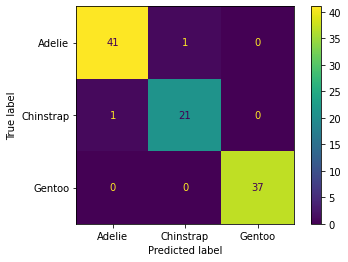

In [ ]:
x = pd.get_dummies(df.drop("species", axis=1), drop_first=True)
y = df["species"]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
preds = model.predict(x_test)
from sklearn.metrics import classification_report, plot_confusion_matrix
print(classification_report(y_test, preds))
plot_confusion_matrix(model, x_test, y_test)

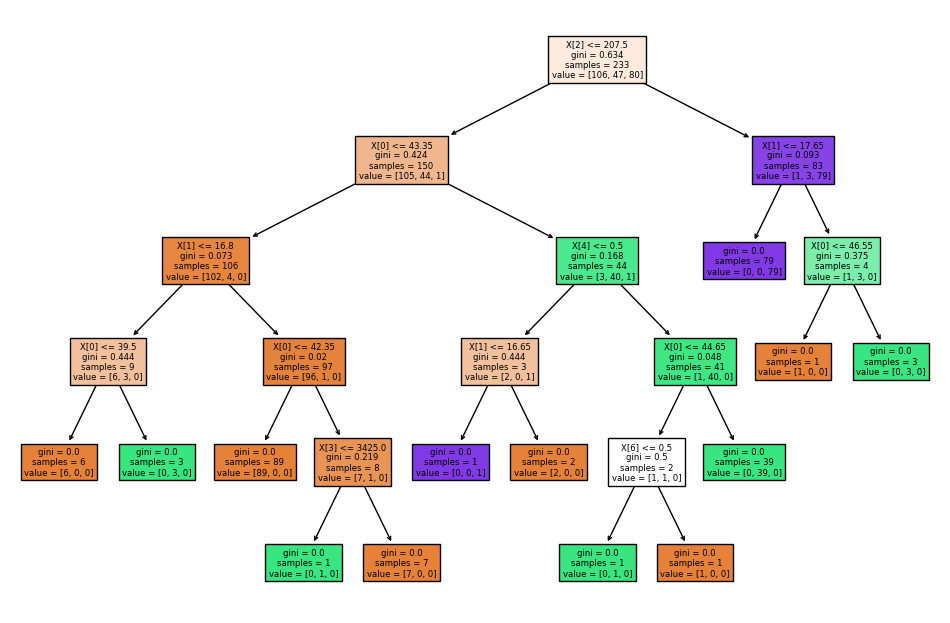

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8), dpi=100)
plot_tree(model, filled=True);

              precision    recall  f1-score   support

      Adelie       0.97      0.97      0.97        40
   Chinstrap       0.95      0.95      0.95        21
      Gentoo       1.00      1.00      1.00        40

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101



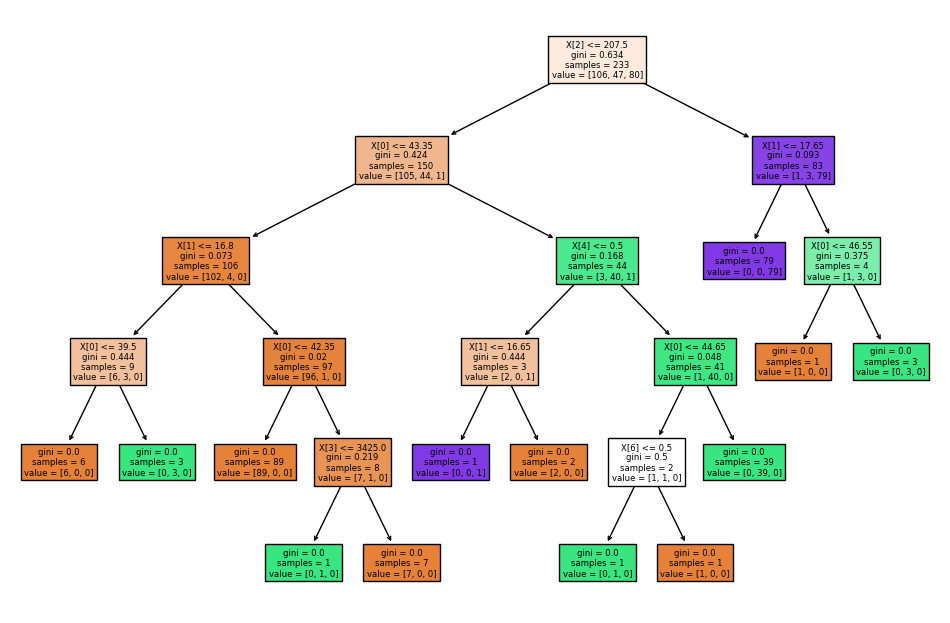

In [ ]:
def report_mode(model):
  preds = model.predict(x_test)
  print(classification_report(y_test, preds))
  plt.figure(figsize=(12,8), dpi=100)
  plot_tree(model, filled=True);
report_mode(model)

# Rand forest

In [7]:
df = pd.read_csv("penguins_size.csv")
df = df.dropna()
df.at[336, "sex"] = "FEMALE"
x = pd.get_dummies(df.drop("species", axis=1), drop_first=True)
y = df["species"]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        45
   Chinstrap       1.00      0.94      0.97        18
      Gentoo       1.00      1.00      1.00        38

    accuracy                           0.99       101
   macro avg       0.99      0.98      0.99       101
weighted avg       0.99      0.99      0.99       101



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


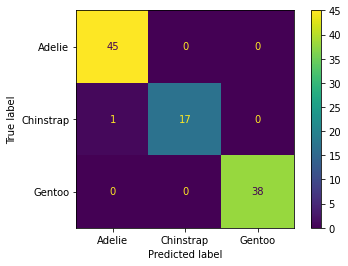

In [13]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100, max_features="auto")

model.fit(x_train, y_train)
preds = model.predict(x_test)
from sklearn.metrics import classification_report, plot_confusion_matrix
print(classification_report(y_test, preds))
plot_confusion_matrix(model, x_test, y_test)

In [15]:
df = pd.read_csv("data_banknote_authentication.csv")
x = df.drop("Class", axis=1)
y = df["Class"]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15)

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
n_estimators = [64,128,100, 200]
max_features = ["auto", "log2", 2, 3, 4]
bootstrap = [True, False]
oob_score = [True, False]
param_grid = {"n_estimators": n_estimators,"max_features": max_features, "bootstrap": bootstrap, "oob_score": oob_score}
grid = GridSearchCV(model, param_grid)
grid.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 411, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/lib

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'log2', 2, 3, 4],
                         'n_estimators': [64, 128, 100, 200],
                         'oob_score': [True, False]})

In [17]:
grid.best_params_

{'bootstrap': True,
 'max_features': 'log2',
 'n_estimators': 200,
 'oob_score': False}

0.9951456310679612


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


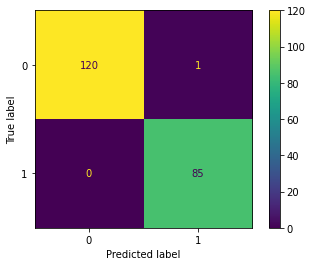

In [22]:
model = RandomForestClassifier(bootstrap=True, n_estimators=25, max_features="log2")
model.fit(x_train, y_train)
preds = model.predict(x_test)
from sklearn.metrics import accuracy_score, plot_confusion_matrix
print(accuracy_score(y_test, preds))
plot_confusion_matrix(model, x_test, y_test)

# Methods


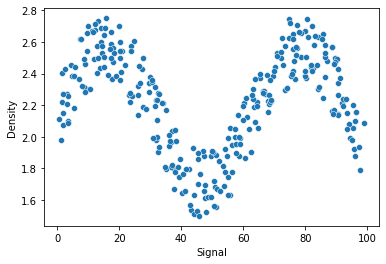

In [26]:
sns.scatterplot(x="Signal", y="Density", data = df)

In [29]:
df = pd.read_csv("rock_density_xray.csv")
df.columns = ["Signal", "Density"]
x = df["Signal"].values.reshape(-1,1)
y = df["Density"]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1)

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
linear_reg_model = LinearRegression()
linear_reg_model.fit(x_train,y_train)
preds = linear_reg_model.predict(x_test)
print(mean_absolute_error(y_test, preds), np.sqrt(mean_squared_error(y_test, preds)))

0.25294720315056957 0.3091054979668067


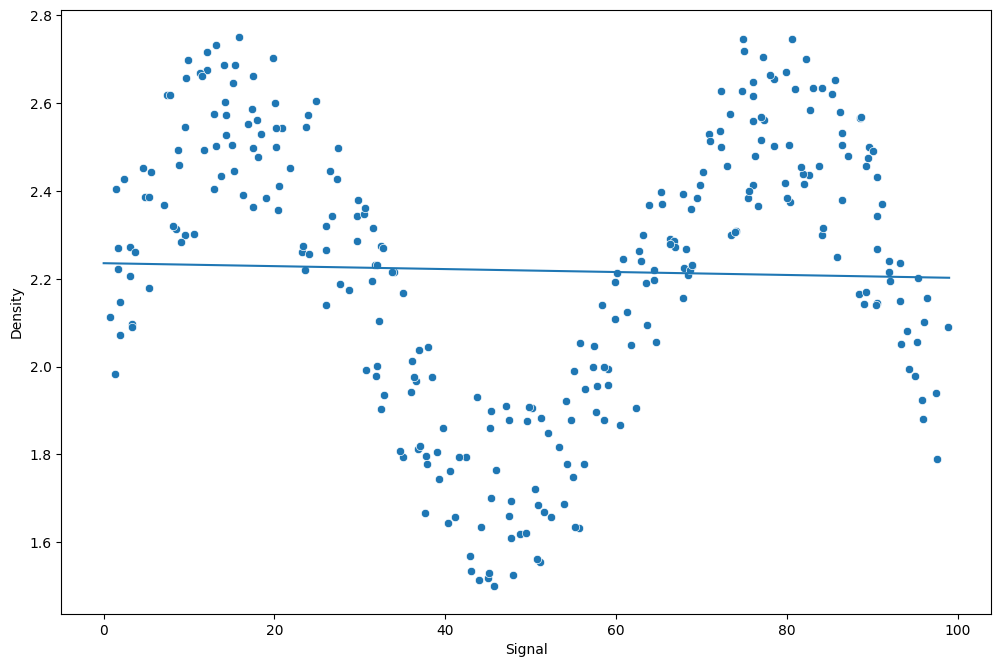

In [34]:
plt.figure(figsize=(12,8), dpi=100)
sns.scatterplot(x="Signal", y="Density", data = df)

signal_range = np.arange(0,100)
signal_preds = linear_reg_model.predict(signal_range.reshape(-1,1))
plt.plot(signal_range, signal_preds)

In [44]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    print(f'RMSE : {rmse}')
    
    # Plot results
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))
    
    
    plt.figure(figsize=(12,6),dpi=100)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')
    plt.plot(signal_range,output)

RMSE : 0.13721632202238981


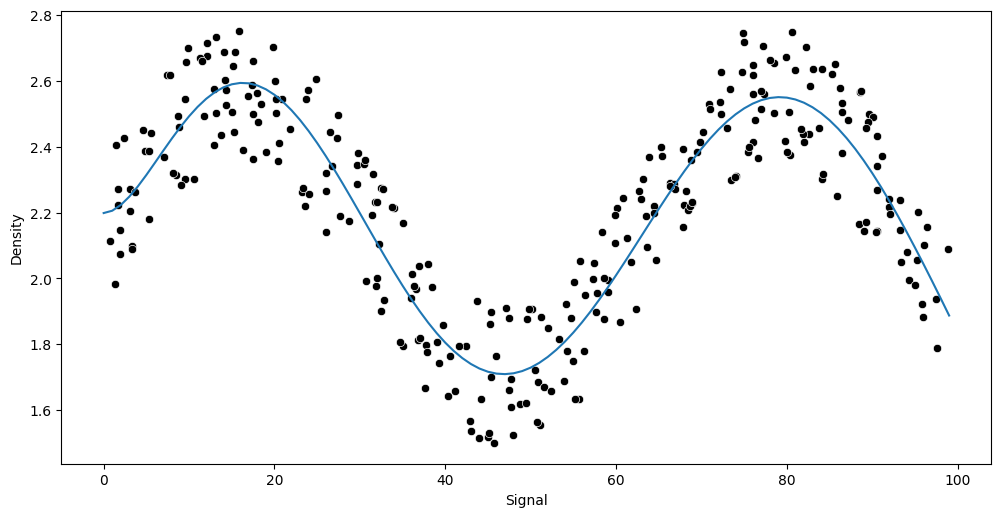

In [45]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
pipe = make_pipeline(PolynomialFeatures(degree=8), LinearRegression())
run_model(pipe, x_train, y_train, x_test, y_test)

RMSE : 0.15625844489419785
RMSE : 0.13753944808245522
RMSE : 0.13192217153810612


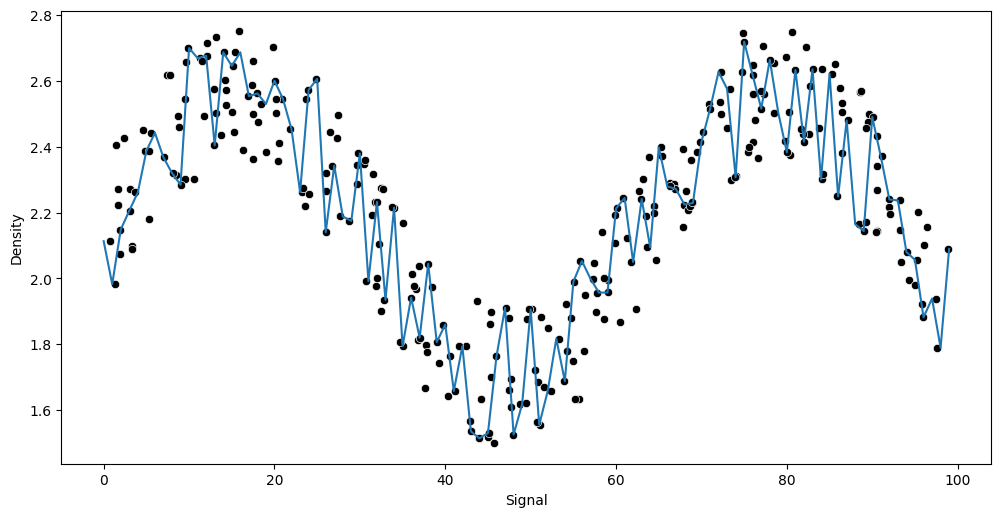

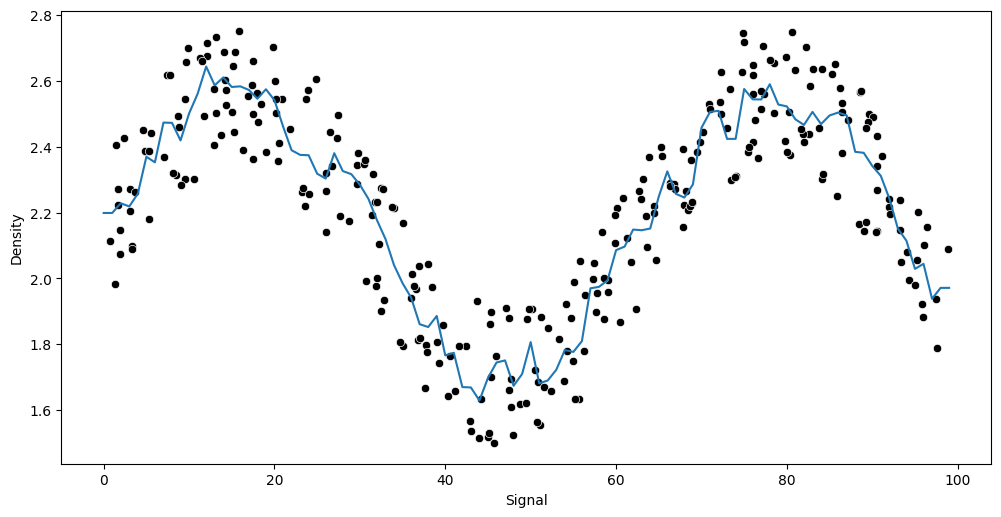

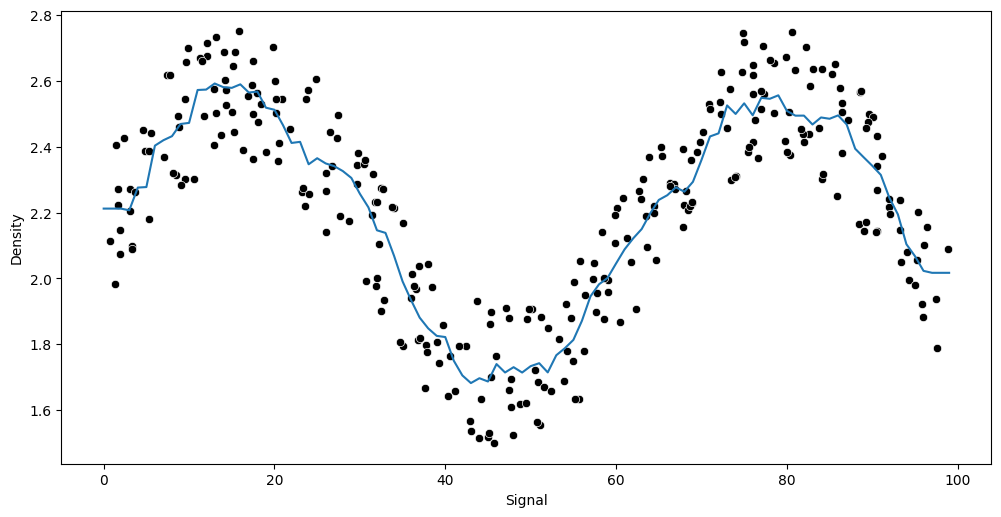

In [46]:
from sklearn.neighbors import KNeighborsRegressor
k_vals = [1,5,10,20]
for k in k_vals:
  pipe = KNeighborsRegressor(k)
  run_model(pipe, x_train, y_train, x_test, y_test)

RMSE : 0.15625844489419785


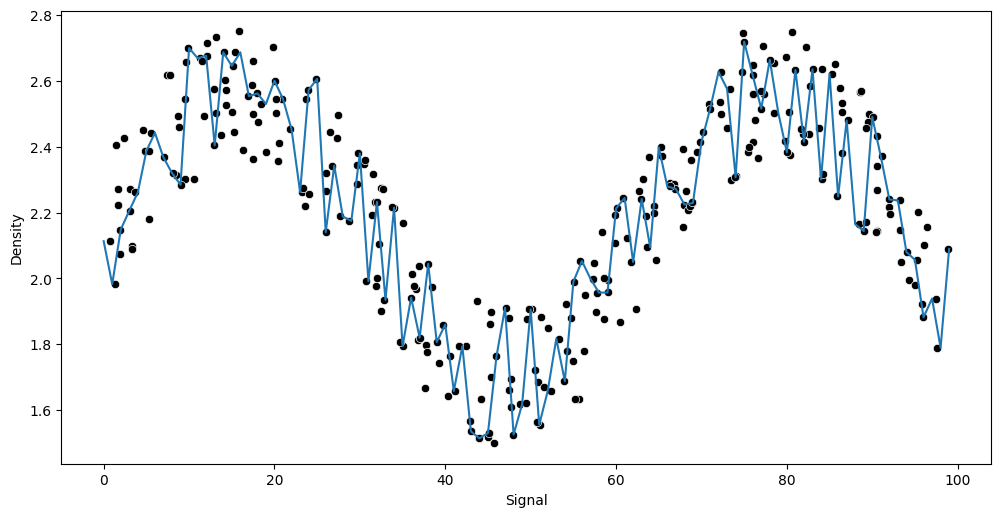

In [47]:
from sklearn.tree import DecisionTreeRegressor
pipe = DecisionTreeRegressor()
run_model(pipe, x_train, y_train, x_test, y_test)

RMSE : 0.14865865348793858


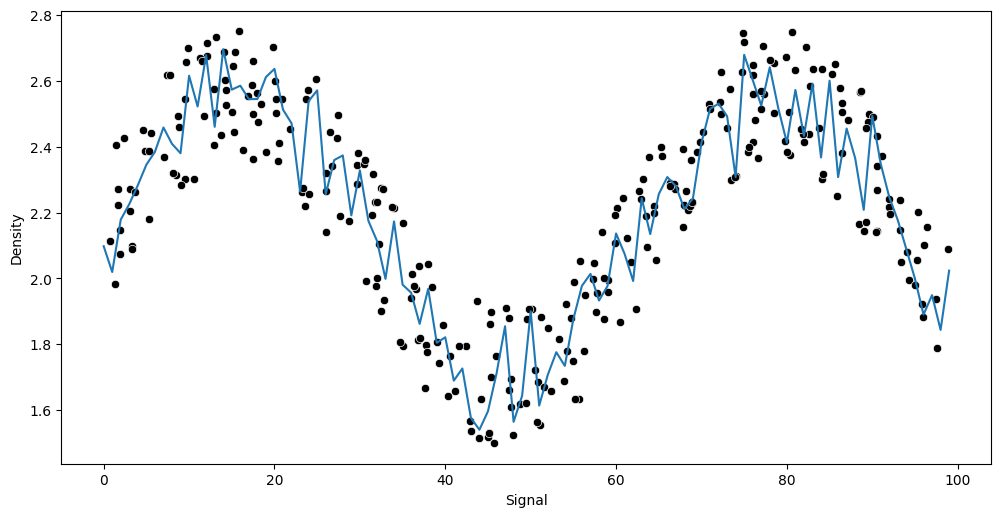

In [55]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=10)
run_model(rfr, x_train, y_train, x_test, y_test)